In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
%matplotlib inline

''' 
The best way to complete this activity is to copy the code in this file into a jupyter notebook file you create. You will also need to download the csv files with the data. This will allow you to see your outputs easier. Once you have finished with your code, copy it back into this file and submit it to Replit. Don't forget to also upload your new code to Github! 
'''

# Linear Regression Practice

# STEP 1: Import the housing data 
housing_data = pd.read_csv('Housing_Data.csv')


In [7]:
housing_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
# STEP 2: Regression is used to determine the relationship between two or more variables within a dataset.
#We will be using the average area income, the average area house age, the average number of rooms,
#the average number of bedrooms and the area population to make a prediction about the pricing of houses within an area. 
#Create two variables, x and y, to train your linear regression model.
x = housing_data[["Avg. Area Income", "Avg. Area House Age", "Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms", "Area Population"]]
y = housing_data["Price"]

In [9]:
# STEP 3: Use the appropriate scikit-learn method split your data into the segments that will be used for training and testing.
#Generally, 75% of your data is used for training and 25% is used to test.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)


In [10]:
# STEP 4: Create a linear regression model using the data you have manipulated and scikit-learn's LinearRegression feature.
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [12]:
# STEP 5: Can you show the correlation coefficients of all the features in your model?
print(model.coef_)

[2.14831076e+01 1.65720477e+05 1.21838254e+05 1.45219749e+03
 1.51844574e+01]


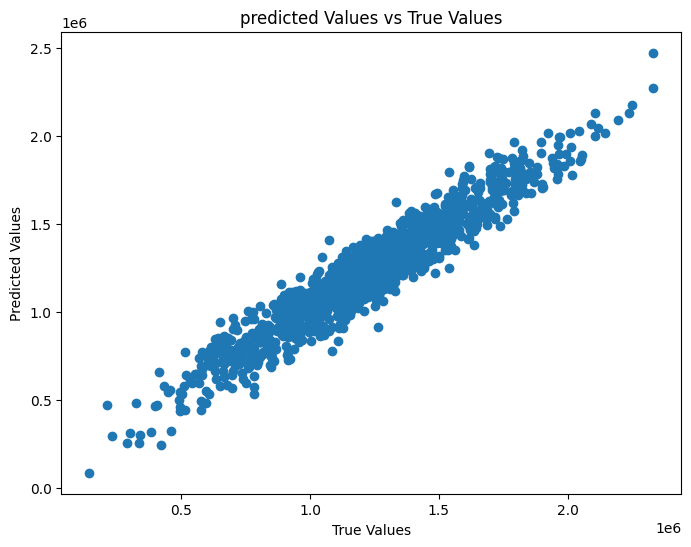

In [15]:
# STEP 6: Create a visualization (scatterplot, histogram, etc) that shows your models predictions and the actual values.
y_pred = model.predict(x_test)

#figure size
plt.figure(figsize=(8, 6))

#output plot
plt.scatter(y_test, y_pred)
plt.title("predicted Values vs True Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.show()

In [52]:
# STEP 7: To evaluate the performance of a model more than just the accuracy has to be considered. 
#There are other metrics like the mean absolute error, the mean squared error and the r-squared error. 
#Calculate these three metrics using scikit-learn's metrics import

#mean squared error
print("Mean squared error: %.2f"%  mean_squared_error(y_test, y_pred))
#mean abs error
print("Mean squared error: %.2f"% mean_absolute_error(y_test, y_pred))
#r-sqared error 
print("Coefficient of determination: %.2f"%  r2_scoore(y_test, y_pred))

NameError: name 'mean_squared_error' is not defined

In [31]:
# Logistic Regression Practice

# STEP 1: Import the titanic data
titanic_data = pd.read_csv('titanic.csv')


In [32]:
# STEP 2: We will be using various features of the titanic data to predict whether or not a passenger survived.
#Create x and y variables to train your logistic regression model. 

titanic_subset = titanic_data[["Pclass", "Sex", "Age", "Fare", "Embarked", "Survived"]]

#rid NA's
print(f"Number of rows before cleaning:  {titanic_subset.shape[0]}")
clean_subset = titanic_subset.dropna()
print(f"Number of rows after cleaning: {titanic_subset.shape[0]}")

#seperate vars
x = clean_subset[["Pclass", "Sex", "Age", "Fare", "Embarked"]]
y = clean_subset["Survived"]

Number of rows before cleaning:  891
Number of rows after cleaning: 891


In [38]:
# STEP 3: Use the appropriate scikit-learn method split your data into the segments that will be used for training and testing. 
#Generally, 75% of your data is used for training and 25% is used to test.

x_dummy = pd.get_dummies(x, columns=["Sex", "Embarked"])
x_dummy

x_train, x_test, y_train, y_test = train_test_split(x_dummy, y, test_size = 0.25)


In [39]:
# STEP 4: Create a logistic regression model using the data you have manipulated and scikit-learn's LogisticRegression feature.
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [40]:
# STEP 5: Can you show the correlation coefficients of all the features in your model?
print(model.coef_)

[-2.00708376e-01 -4.92669302e-03 -4.39457577e-05  2.27617469e-01
 -2.27617469e-01  6.61380426e-02 -6.48229244e-02 -1.31511821e-03]


In [42]:
# STEP 6: Logistic regression models are evaluated differently than linear regression models.
# Use the appropriate metrics features from scikit learn to create a report and a matrix for your model
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

print(cm)

ValueError: Classification metrics can't handle a mix of binary and continuous targets